In [2]:
import pandas as pd
from pymongo import MongoClient
import pprint
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/train.csv', index_col='ID')

In [4]:
documents = df.to_dict(orient='Records')

In [5]:
client = MongoClient('localhost', 27017)
db = client['food_delivery']
collection = db['edf']

In [6]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
ID,,,,,,,,,,,,,,,,,,,
0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16


In [7]:
distinct_types = collection.distinct("Type_of_vehicle")

result_dict = {"Type_of_vehicle": [], "count": []}

for vehicle_type in distinct_types:
    count = collection.count_documents({"Type_of_vehicle": vehicle_type})
    result_dict["Type_of_vehicle"].append(vehicle_type)
    result_dict["count"].append(count)

df_vehi = pd.DataFrame(result_dict)

# Affichez les résultats
print(df_vehi)

     Type_of_vehicle  count
0           bicycle      68
1  electric_scooter    3814
2        motorcycle   26435
3           scooter   15276


In [8]:
# Nettoyage de la colonne 'Time_taken(min)'
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '').str.strip()
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'], errors='coerce')

# Nettoyage de la colonne 'Weatherconditions'
df['Weatherconditions'] = df['Weatherconditions'].apply(lambda x: x.replace('conditions', '').strip())

# Nettoyage de la colonne 'City'
df['City'] = df['City'].str.strip()


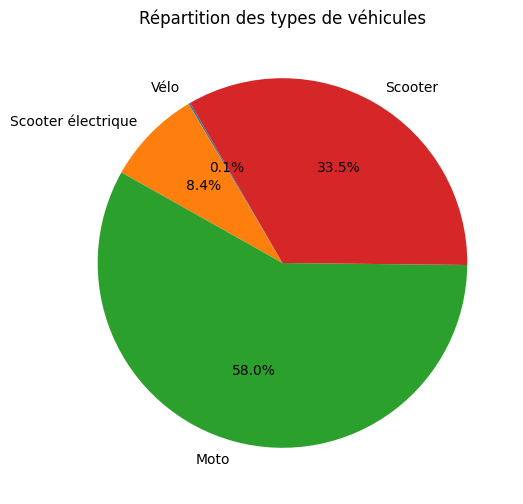

In [9]:
import matplotlib.pyplot as plt

df_vehi['Type_of_vehicle'] = df_vehi['Type_of_vehicle'].replace({
    'bicycle ': 'Vélo',
    'electric_scooter ': 'Scooter électrique',
    'motorcycle ': 'Moto',
    'scooter ' : 'Scooter',
})

plt.figure(figsize=(10, 6))
plt.pie(df_vehi['count'], labels=df_vehi['Type_of_vehicle'], autopct='%1.1f%%', startangle=120)
plt.title('Répartition des types de véhicules')

plt.show()

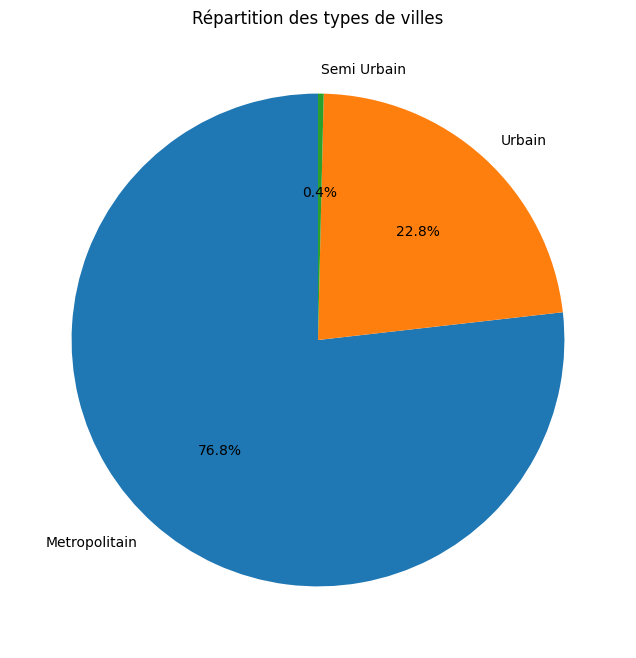

In [34]:
df['City'] = df['City'].replace({
    'Metropolitian': 'Metropolitain',
    'Semi-Urban': 'Semi Urbain',
    'Urban': 'Urbain',
})
    
allowed_values = ['Metropolitain', 'Semi Urbain', 'Urbain']
filtered_df = df[df['City'].isin(allowed_values)]
city_counts = filtered_df['City'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des types de villes')
plt.show()

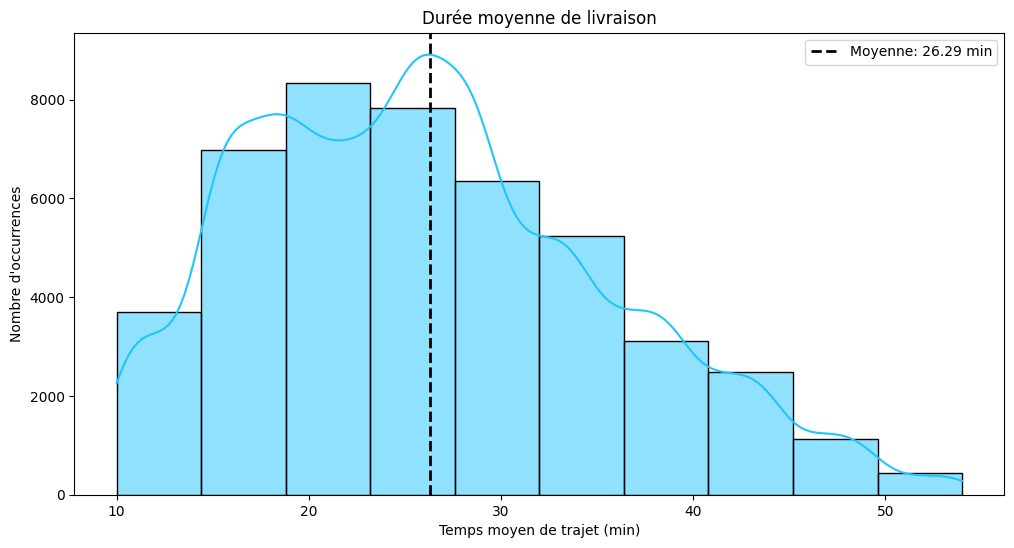

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_coll = df
plt.figure(figsize=(12, 6))
sns.histplot(df_coll['Time_taken(min)'], bins=10, kde=True, color='#21c5fc')
plt.title('Durée moyenne de livraison')
plt.xlabel('Temps moyen de trajet (min)')
plt.ylabel('Nombre d\'occurrences')

time = df_coll['Time_taken(min)'].mean()
plt.axvline(time, color='black', linestyle='dashed', linewidth=2, label=f'Moyenne: {time:.2f} min')
plt.legend()

plt.show()


In [11]:
# plt.figure(figsize=(12, 6))
# sns.violinplot(x='Road_traffic_density', y='Time_taken(min)', data=df)
# plt.title('Relation entre le traffic et le temps de livraison')
# plt.xlabel('Densité du trafic')
# plt.ylabel('Temps de livraison (min)')
# plt.show()


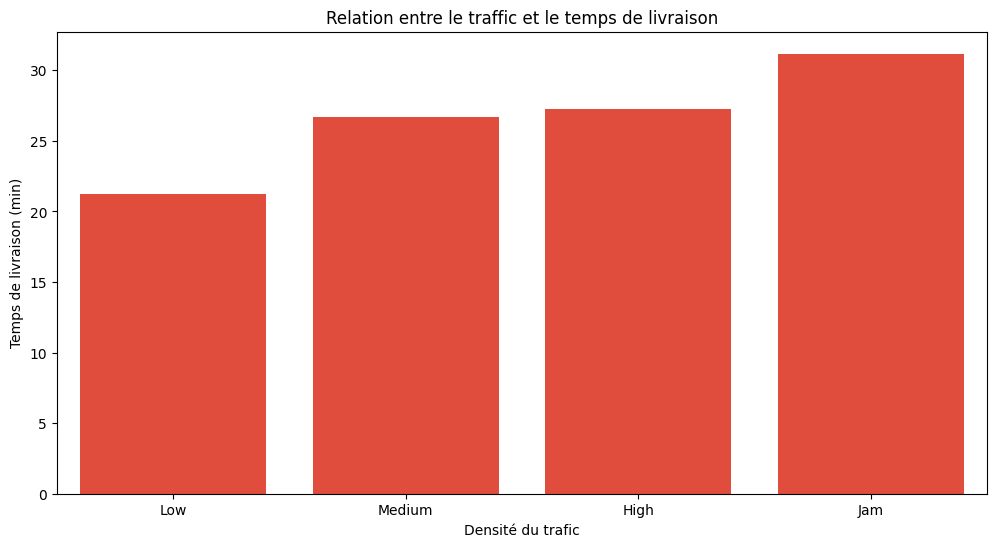

In [12]:
df_filtered = df.dropna(subset=['Road_traffic_density'])
df_filtered['Road_traffic_density'] = df_filtered['Road_traffic_density'].str.strip()

order = ["Low", "Medium", "High", "Jam"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Road_traffic_density', y='Time_taken(min)', data=df_filtered, order=order, color='#fc3721', errorbar=None)
plt.title('Relation entre le traffic et le temps de livraison')
plt.xlabel('Densité du trafic')
plt.ylabel('Temps de livraison (min)')
plt.show()


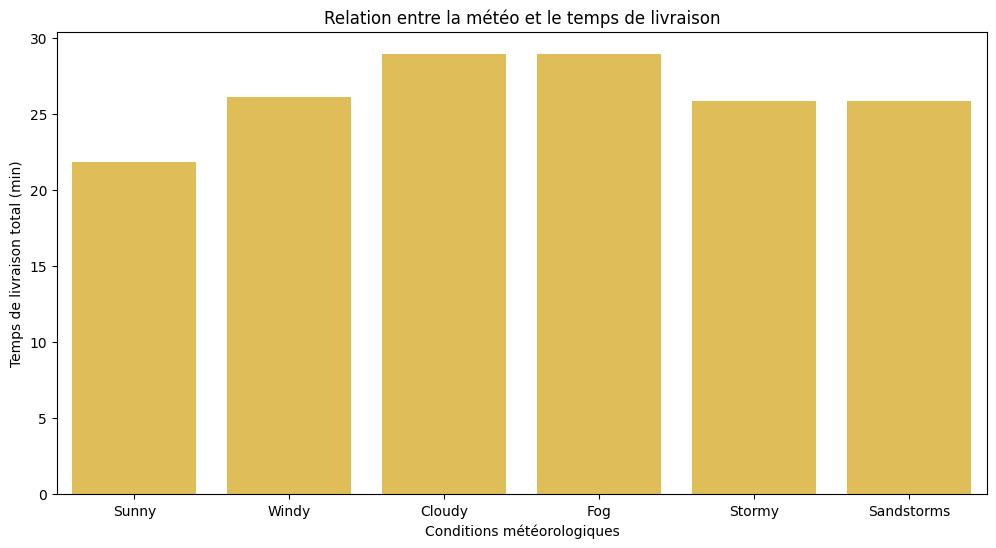

In [13]:
df_filtered = df.dropna(subset=['Weatherconditions'])
order = ['Sunny', 'Windy', 'Cloudy', 'Fog', 'Stormy', 'Sandstorms']

plt.figure(figsize=(12, 6))
sns.barplot(x='Weatherconditions', y='Time_taken(min)', data=df_filtered, order=order, color='#f5c842', errorbar=None)
plt.title('Relation entre la météo et le temps de livraison')
plt.xlabel('Conditions météorologiques')
plt.ylabel('Temps de livraison total (min)')

plt.show()

In [14]:
# plt.figure(figsize=(12, 6))
# sns.violinplot(x='Time_taken(min)', y='Type_of_vehicle', data=df)
# plt.title('Relation entre le type de véhicule et le temps de livraison')
# plt.xlabel('Temps de livraison (min)')
# plt.ylabel('Type de véhicule')
# plt.show()


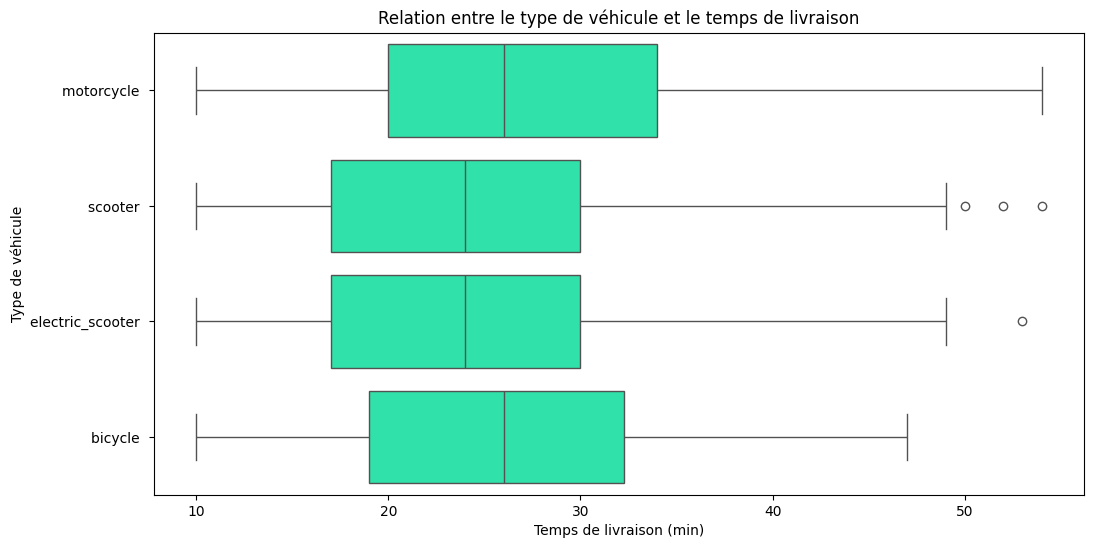

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time_taken(min)', y='Type_of_vehicle', data=df, color='#12ffb4')
plt.title('Relation entre le type de véhicule et le temps de livraison')
plt.xlabel('Temps de livraison (min)')
plt.ylabel('Type de véhicule')
plt.show()


In [16]:
df_graph = df
avg_delivery = df_graph.groupby('Type_of_vehicle')['Time_taken(min)'].mean().reset_index()
avg_delivery['Time_taken(min)'] = avg_delivery['Time_taken(min)'].round(1)

avg_delivery

,Type_of_vehicle,Time_taken(min)
0,bicycle,26.4
1,electric_scooter,24.5
2,motorcycle,27.6
3,scooter,24.5


In [23]:
df_filtered = df.dropna(subset=['Weatherconditions'])

df_filtered['City'] = df_filtered['City'].replace({
    'Metropolitian': 'Metropolitain',
    'Semi-Urban': 'Semi Urbain',
    'Urban': 'Urbain',
})

allowed_values = ["Metropolitain", "Semi Urbain", "Urbain"]
df_filtered = df_filtered[df_filtered['City'].isin(allowed_values)]
avg_delivery = df_filtered.groupby('City')['Time_taken(min)'].mean().reset_index()
avg_delivery['Time_taken(min)'] = avg_delivery['Time_taken(min)'].round(1)

avg_delivery

,City,Time_taken(min)
0,Metropolitain,27.3
1,Semi Urbain,49.7
2,Urbain,23.0


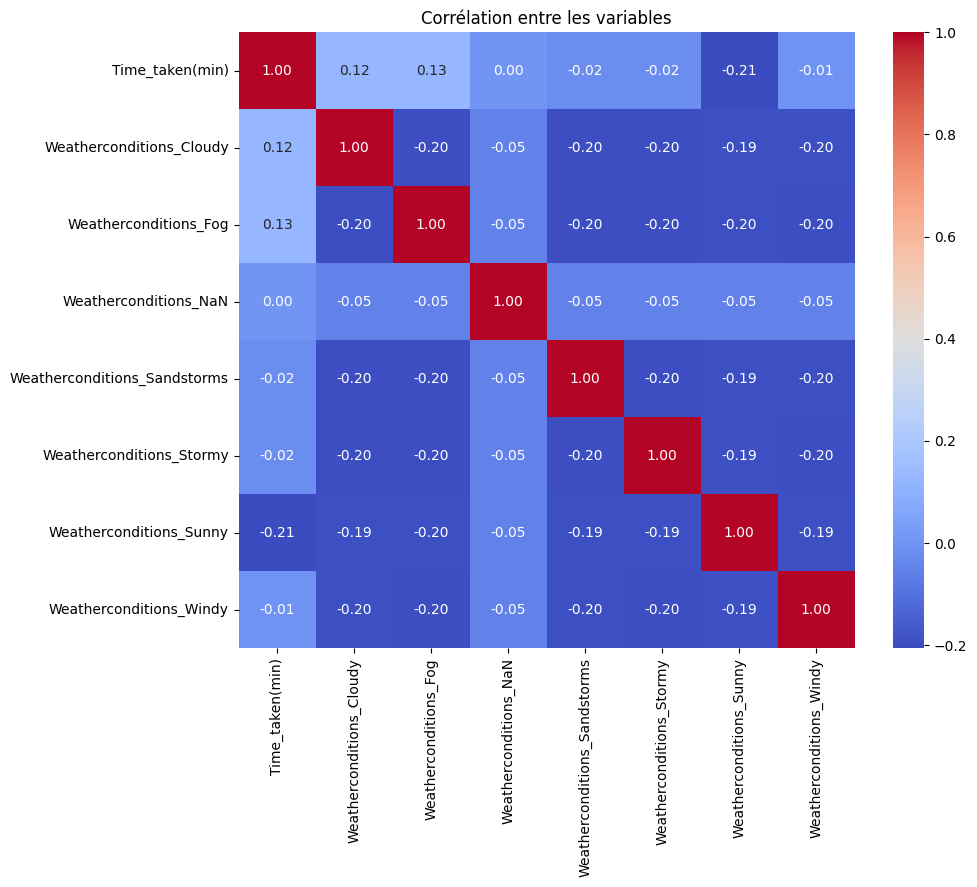

In [18]:
# Convertir les variables catégorielles en variables indicatrices
df_encoded = pd.get_dummies(df[['Weatherconditions', 'Time_taken(min)']])

# Calcul de la matrice de corrélation sur les variables indicatrices
correlation_matrix = df_encoded.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Corrélation entre les variables')
plt.show()
